H0 : There is no difference in loneliness scores between individuals who play online games frequently with friends and those who do not.
T-test results: t-statistic = -0.5250241450708119, p-value = 0.5997880617781706

Descriptive Statistics:
             Group  Mean Loneliness  Std Loneliness  Sample Size
0  Frequent Gamers         3.701342        1.666080          298
1       Non-Gamers         3.779923        1.841022          259


<Figure size 1000x600 with 0 Axes>

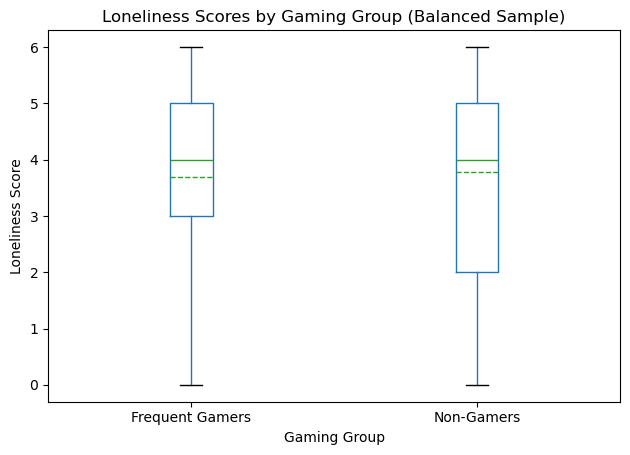

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv'
data = pd.read_csv(file_path, low_memory=False)

# Extract relevant columns and create a copy of the subset
relevant_columns = [
    'CONNECTION_activities_onlinegames_p3m', 
    'LONELY_ucla_loneliness_scale_left_out', 
    'LONELY_dejong_emotional_social_loneliness_scale_score',
    'CONNECTION_activities_talked_family_p3m',
    'CONNECTION_activities_talked_hobbies_p3m'
]
subset_data = data[relevant_columns].copy()  # Create a deep copy to avoid warnings

# Clean and categorize the "Online Social Gaming" variable using .loc
subset_data['gaming_category'] = subset_data['CONNECTION_activities_onlinegames_p3m'].apply(
    lambda x: 'Frequent Gamers' if x in ['Daily', 'A few times a week'] else 'Non-Gamers'
)

# Filter data by gaming category
frequent_gamers = subset_data[subset_data['gaming_category'] == 'Frequent Gamers']
non_gamers = subset_data[subset_data['gaming_category'] == 'Non-Gamers']

# Balance sample sizes
min_size = min(len(frequent_gamers), len(non_gamers))
frequent_gamers_sample = frequent_gamers.sample(n=min_size, random_state=42)
non_gamers_sample = non_gamers.sample(n=min_size, random_state=42)

# Combine balanced groups
balanced_data = pd.concat([frequent_gamers_sample, non_gamers_sample])

# Perform analysis on balanced data
frequent_gamers_loneliness = balanced_data[balanced_data['gaming_category'] == 'Frequent Gamers']['LONELY_dejong_emotional_social_loneliness_scale_score'].dropna()
non_gamers_loneliness = balanced_data[balanced_data['gaming_category'] == 'Non-Gamers']['LONELY_dejong_emotional_social_loneliness_scale_score'].dropna()

# Descriptive statistics
descriptive_stats = {
    "Group": ["Frequent Gamers", "Non-Gamers"],
    "Mean Loneliness": [frequent_gamers_loneliness.mean(), non_gamers_loneliness.mean()],
    "Std Loneliness": [frequent_gamers_loneliness.std(), non_gamers_loneliness.std()],
    "Sample Size": [len(frequent_gamers_loneliness), len(non_gamers_loneliness)],
}

descriptive_stats_df = pd.DataFrame(descriptive_stats)

# Perform t-test
t_stat, p_value = ttest_ind(frequent_gamers_loneliness, non_gamers_loneliness, equal_var=False)

# Print t-test results and descriptive stats
print("H0 : There is no difference in loneliness scores between individuals who play online games frequently with friends and those who do not.")
print(f"T-test results: t-statistic = {t_stat}, p-value = {p_value}")
print("\nDescriptive Statistics:")
print(descriptive_stats_df)

# Create a box plot for the loneliness scores by gaming group
plt.figure(figsize=(10, 6))
balanced_data.boxplot(
    column='LONELY_dejong_emotional_social_loneliness_scale_score',
    by='gaming_category',
    grid=False,
    showmeans=True,
    meanline=True
)

# Enhance plot aesthetics
plt.title('Loneliness Scores by Gaming Group (Balanced Sample)')
plt.suptitle('')  # Remove the automatic subplot title
plt.xlabel('Gaming Group')
plt.ylabel('Loneliness Score')
plt.xticks(rotation=0)
plt.tight_layout()

# Display the plot
plt.show()

In [7]:
# Calculate additional descriptive statistics for each group
frequent_gamers_stats = {
    'Group': 'Frequent Gamers',
    'Mean': frequent_gamers_loneliness.mean(),
    'Median': frequent_gamers_loneliness.median(),
    'Mode': frequent_gamers_loneliness.mode().iloc[0] if not frequent_gamers_loneliness.mode().empty else None,
    'Std Dev': frequent_gamers_loneliness.std(),
    'IQR': frequent_gamers_loneliness.quantile(0.75) - frequent_gamers_loneliness.quantile(0.25),
    'Sample Size': len(frequent_gamers_loneliness)
}

non_gamers_stats = {
    'Group': 'Non-Gamers',
    'Mean': non_gamers_loneliness.mean(),
    'Median': non_gamers_loneliness.median(),
    'Mode': non_gamers_loneliness.mode().iloc[0] if not non_gamers_loneliness.mode().empty else None,
    'Std Dev': non_gamers_loneliness.std(),
    'IQR': non_gamers_loneliness.quantile(0.75) - non_gamers_loneliness.quantile(0.25),
    'Sample Size': len(non_gamers_loneliness)
}

# Combine statistics into a DataFrame
additional_stats_df = pd.DataFrame([frequent_gamers_stats, non_gamers_stats])

# Display the results
print(additional_stats_df)


             Group      Mean  Median  Mode   Std Dev  IQR  Sample Size
0  Frequent Gamers  3.701342     4.0   3.0  1.666080  2.0          298
1       Non-Gamers  3.775868     4.0   6.0  1.828819  3.0         8263
